## Spatial Data Structures
As we discussed, spatial data structures in modern Python implementation, as with R, rely on core libraries under the hood.

These libraries include: 

  - **PROJ** --> projections, transformations  
  
  - **GEOS** --> Geometry operations (measures, relations)
  
  - **GDAL** --> geodata abstraction and processing (read, write)
  
As in R and elsewhere with spatial data, we have two main data models for spatial data that define how our conceptual model of elements of data are organized:
- *vector data model*:  points, lines and areas
- *raster data model*: a grid-like structure that holds values for each grid cell

We also have *extensions* of these data models with:
- *spatio-temporal data model*: A data model that incorporates time (t) as an additional dimension to the geographical dimension (x, y)
- *topological data model*: A data model that *integrates* vector data so that topological relationships are incorporated into the core model, e.g. street networks (shortest routes) and for us, river networks - upstream / downstream relationships

We apply different sets of spatial tools for different kinds of operations depending on the data model we're working with.

**Vector Geometry Types**
As we saw in R, our basic vector geometry types are defined with the [Simple Features Access Specification](https://www.ogc.org/standards/) - these types are `Point`, `LineString`, `Polygon`, and the collections types of `Multipoint`, `MultiLineString`, and `MultiPolygon`.

Just as we showed previously, these geometries use either `WKT` or `WKB` specifications in a list-column to repesent vector data features.

**Raster Data Type**

In the raster data model data is represented as arrays of cells (pixels) to represent real-world objects or continuous phenomena. Photos with a digital camera are essentially raster data (without spatial reference though) that capture RGB colors and store as pixels in separate layers (or bands or channels). 

Aspects of the raster data model include:
- *spatial resolution*: The size in real world units of the a cell
- *continuous or discrete* do the cells represent continuous information like soil type or geology or discrete information like land cover classification?
- *bit depth*: The range of values the raster can hold


![_ Raster data model ](../img/raster_data_model.jpg)

_Figure 1. Raster data model from [Python for Geographic Data Analysis Chapter 5](https://pythongis.org/part2/chapter-05/nb/01-introduction-to-geographic-data-in-python.html)_


![_**Figure 2**. Examples of raster bit depths._](../img/raster_bit_depths.jpg)

_Figure 2. Raster data model from [Python for Geographic Data Analysis Chapter 5](https://pythongis.org/part2/chapter-05/nb/01-introduction-to-geographic-data-in-python.html)_

**Raster data formats**

Raster data comes in a wide variety of formats but a few of the most common are:

- **GeoTIFF**: An popen, non-proprietary raster data format based on the `TIFF format` originally developed at NASA in the early 90's. Portable and platform independent. The file extension of GeoTIFF is `.tif`. 
- **COG**: A Cloud Optimized GeoTIFF (COG) is a file format based on GeoTIFF. COG files are typically hosted on HTTP file servers. The format can enable more efficient workflows with large data files by leveraging the ability of users to *retrieve just the parts of the file that they need*, instead of downloading the whole file every time. The file extension of COG is `.tif` (i.e. the same as with GeoTIFF). 
- **NetCDF**: Network Common Data Form (NetCDF) is a portable, self-describing and scalable file format for storing array-oriented multidimensional scientific data, commonly used for storing earch science data. Variables stored in NetCDF are often measured multiple times per day (i.e.. temporal) over large (e.g. continental) areas. The file extension of NetCDF is `.nc4`. 
- **ASCII Grid**: The ASCII Raster File format is a simple format that can be used to transfer raster data between various applications. The file format was originally developed by ESRI and it is also known as Arc/Info ASCII grid. The file extension of ASCII Raster File is `.asc`. 
- **IMG**: The ERDAS Imagine file format (IMG) is proprietary file format that was originally created by an image processing software company called ERDAS. The file can be accompanied with an .xml file which stores metadata information about the raster layer. The file extension of Imagine file format is `.img`.

**Network Data Model**
See [this section in Python for Geographic Data Analysis](https://pythongis.org/part2/chapter-05/nb/01-introduction-to-geographic-data-in-python.html#representing-spatial-networks) for a nice treatment of the network data model.

### Vector Data in Python
We can see see the list of supported drivers for vector data available through GDAL and exposesed by the `Fiona` library:

In [1]:
import fiona; fiona.supported_drivers

{'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'raw',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'raw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'raw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'raw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

### `Geopandas` Uses [Simple Feature Access](https://www.ogc.org/standard/sfa/)
**Vector** geometry with `Geopandas` and `Shapely`. Just as we saw with `sf` in R, `geopandas` uses Simple Feature Access standard for storing vector geometry.

As decribed in the [Geopandas documentation](https://geopandas.org/en/stable/docs/user_guide/data_structures.html), `Geopandas` has two main data structures much like `sf` in R, `Geoseries` and `GeoDataFrame` - they are subcasses of `pandas.Series` and `pandas.DataFrame`.

A GeoSeries is a vector where each entry in the vector is a set of shapes corresponding to one observation.  As we mentioned above, with the `Simple Features` specification the `Geopandas` uses we have three main types of geometries:
* `Point` /  `Multipoint`
* `LineString` / `MultiLineString`
* `Polygon` / `MultiPolygon`

#### `Shapely` attributes and methods
We can use most [attributes and methods](https://shapely.readthedocs.io/en/stable/manual.html) for `Shapely` objects in the `Geopandas` `Geoseries` class.

This is a reiteration of material found in the [Geopandas user guide](https://geopandas.org/en/stable/docs/user_guide/data_structures.html) but just to highlight here:

**Attributes**
*area*: shape area (units of projection – see projections)

*bounds*: tuple of max and min coordinates on each axis for each shape

*total_bounds*: tuple of max and min coordinates on each axis for entire GeoSeries

*geom_type*: type of geometry.

*is_valid*: tests if coordinates make a shape that is reasonable geometric shape according to the Simple Feature Access standard.

*make_valid*: repairs invalid geometries.

**Methods**
*distance()*: returns Series with minimum distance from each entry to other

*centroid*: returns GeoSeries of centroids

*representative_point()*: returns GeoSeries of points that are guaranteed to be within each geometry - doesn'y return centroids.

*to_crs()*: change coordinate reference system

*plot()*: plot a GeoSeries

**Relationship tests**
*geom_almost_equals()*: is shape almost the same as other (good when floating point precision issues make shapes slightly different)

*contains()*: is shape contained within other

*intersects()*: does shape intersect other

**GeoDataFrames**
A `GeoDataFrame` always has a `GeoSeries` column that contains the `GeoDataFrame`s geometry

In [6]:
import geopandas as gp
import pygeohydro as gh

<Axes: >

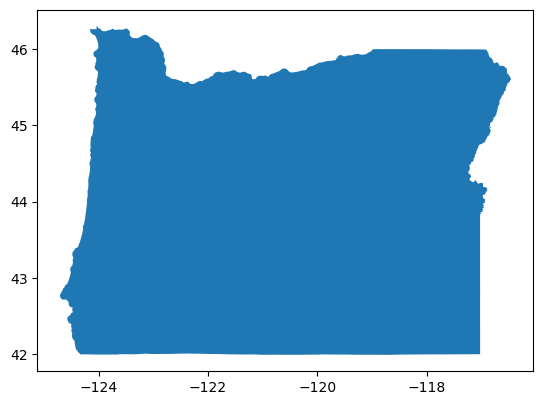

In [8]:
states = gh.get_us_states("contiguous")
oregon = states[states.STUSPS == "OR"]
oregon.plot()

What is the name of our data frame column that stores geometry?

In [15]:
oregon.geometry.name

'geometry'

Check if our geometry is valid:

In [13]:
oregon['geometry'].is_valid

<bound method GeoPandasBase.make_valid of 16    POLYGON ((-121.44123 45.69728, -121.42442 45.6...
Name: geometry, dtype: geometry>

Here we're throwing in a little extra twist using [geoconnex](https://geoconnex.internetofwater.dev/) to access US counties and get counties for Oregon.  [Geoconnex](https://geoconnex.internetofwater.dev/) is a web service developed by Internet Of Water that provides access to a number of hydro-linked datasets and [PyNHD](https://docs.hyriver.io/examples/notebooks/geoconnex.html) provides access to all GeoConnex endpoints.

In [17]:
from pynhd import GeoConnex
gcx = GeoConnex(dev=False)
print("\n".join(f"{n}: {e.description}" for n, e in gcx.endpoints.items()))

hu02: Two-digit Hydrologic Regions
hu04: Four-digit Hydrologic Subregion
hu06: Six-digit Hydrologic Basins
hu08: Eight-digit Hydrologic Subbasins
hu10: Ten-digit Watersheds
nat_aq: National Aquifers of the United States from USGS National Water Information System National Aquifer code list.
principal_aq: Principal Aquifers of the United States from 2003 USGS data release
sec_hydrg_reg: Secondary Hydrogeologic Regions of the Conterminous United States from 2018 USGS data release
gages: US Reference Stream Gage Monitoring Locations
mainstems: US Reference Mainstem Rivers
states: U.S. States
counties: U.S. Counties
aiannh: Native American Lands
cbsa: U.S. Metropolitan and Micropolitan Statistical Areas
ua10: Urbanized Areas and Urban Clusters (2010 Census)
places: U.S. legally incorporated and Census designated places
pws: U.S. Public Water Systems
dams: US Reference Dams


We can get a bit of information on how we can query an endpoint using `.item`:

In [19]:
gcx.item = "counties"
gcx

Item: 'counties'
Description: U.S. Counties
Queryable Fields: fid, uri, statefp, countyfp, countyns, affgeoid, geoid, name, lsad, census_profile
Extent: (-170, 15, -51, 72)

We want counties in Oregon so we should query `statefp` and use Oregon's FIPs code of `41` as the value

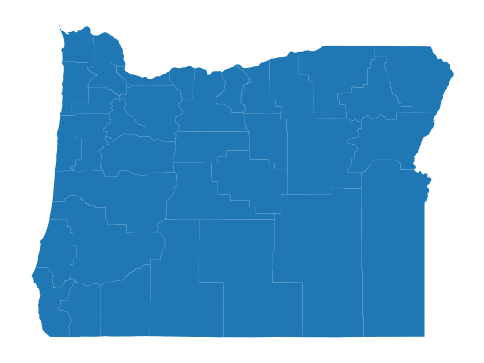

In [52]:
or_counties = gcx.byid("statefp", "41")
ax = or_counties.plot(figsize=(6, 6))
ax.set_axis_off()

We can create centroids *and* make the centroids the geometry

Why doesn't this work?  Take a minute before looking below at answer!

That doesn't work either.  Why??

In [55]:
or_counties_exploded = or_counties_exploded.explode(column='geometry', ignore_index=True, index_parts=False)

In [57]:
or_counties_exploded.head()

,countyns,fid,uri,countyfp,affgeoid,name,census_profile,statefp,lsad,geometry
0,01135845,1237,https://geoconnex.us/ref/counties/41001,001,0500000US41001,Baker,https://data.census.gov/cedsci/profile?g=05000...,41,06,"POLYGON ((-118.51944 44.70588, -118.51818 44.7..."
1,01155126,247,https://geoconnex.us/ref/counties/41003,003,0500000US41003,Benton,https://data.census.gov/cedsci/profile?g=05000...,41,06,"POLYGON ((-123.81670 44.34461, -123.77660 44.3..."
2,01155127,3150,https://geoconnex.us/ref/counties/41005,005,0500000US41005,Clackamas,https://data.census.gov/cedsci/profile?g=05000...,41,06,"POLYGON ((-122.86789 45.31734, -122.85717 45.3..."
3,01135846,384,https://geoconnex.us/ref/counties/41007,007,0500000US41007,Clatsop,https://data.census.gov/cedsci/profile?g=05000...,41,06,"POLYGON ((-123.59892 46.25145, -123.59842 46.2..."
4,01135846,384,https://geoconnex.us/ref/counties/41007,007,0500000US41007,Clatsop,https://data.census.gov/cedsci/profile?g=05000...,41,06,"POLYGON ((-123.66614 46.24501, -123.66529 46.2..."


<Axes: >

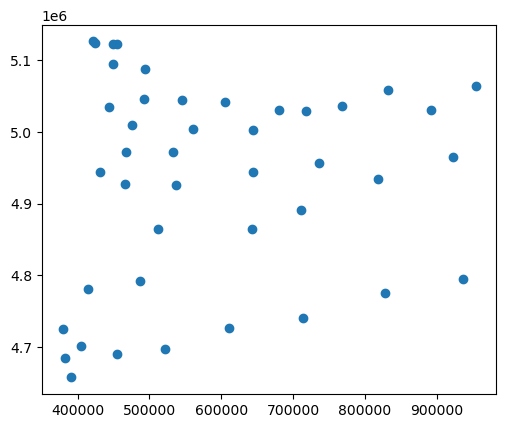

In [59]:
or_counties_exploded = or_counties_exploded.to_crs(epsg=32610)
pts = or_counties_exploded['geometry'].centroid
pts.plot()

### Raster Data in Python
We can see see the list of supported drivers for raster data available through GDAL:

In [3]:
from osgeo import gdal
all_driver_names = [gdal.GetDriver(i).GetDescription() for i in range(gdal.GetDriverCount())] 
gdal_driver_names = [driver_name for driver_name in all_driver_names if gdal.GetDriverByName(driver_name).GetMetadataItem('DCAP_RASTER') == 'YES']


In [4]:
gdal_driver_names[0:10]

['VRT',
 'DERIVED',
 'GTiff',
 'COG',
 'NITF',
 'RPFTOC',
 'ECRGTOC',
 'HFA',
 'SAR_CEOS',
 'CEOS']

In [18]:
len(gdal_driver_names)

145

## Web APIs

API allows one program to talk to another program and services provided by an API allow you to query for information in an automated way.

APIs are incredibly useful for mapping and spatial analysis and allow you to query web servers and get results without downloading data or running computation on your machine.

Sommon use cases for using APIs for spatial analysis are

Getting directions / routing
Route optimization
Geocoding
Downloading data
Getting real-time weather data


### JSON, GeoJSON

JSON stands for JavaScript Object Notation. It's used for storing and transporting data and is the de-facto standard for data exchanged by APIs. GeoJSON is an extension of the JSON format that is commonly used to represent spatial data.

Python has a built-in json module that has methods for reading json data and converting it to Python objects, and vice-versa. 

The GeoJSON data contains features, where each feature has some properties and a geometry.

In [3]:
geojson_string = '''
{
  "type": "FeatureCollection",
  "features": [
    {"type": "Feature",
      "properties": {"name": "Corvallis"},
      "geometry": {"type": "Point", "coordinates": [-123.2620, 44.5646]}
    }
  ]
}
'''
print(geojson_string)


{
  "type": "FeatureCollection",
  "features": [
    {"type": "Feature",
      "properties": {"name": "Corvallis"},
      "geometry": {"type": "Point", "coordinates": [-123.2620, 44.5646]}
    }
  ]
}



We can convert this JSON string to a Python object (i.e. parsing JSON) using the json.loads() method. This converts our JSON string to a Python dictionary.

In [4]:
import json

data = json.loads(geojson_string)
print(type(data))
print(data)

<class 'dict'>
{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'properties': {'name': 'Corvallis'}, 'geometry': {'type': 'Point', 'coordinates': [-123.262, 44.5646]}}]}


With the parsed GeoJSON string we have a Python dictionary we can more easily extract infromation from. The data is stored as a FeatureCollection in the dictionary. In this toy example, we have just 1 feature inside the feature collection, so we can access it by using index 0.

In [5]:
city_data = data['features'][0]
print(city_data)

{'type': 'Feature', 'properties': {'name': 'Corvallis'}, 'geometry': {'type': 'Point', 'coordinates': [-123.262, 44.5646]}}


Since the feature representation is a dictionary we can access individual items using `keys`

In [8]:
city_name = city_data['properties']['name']
city_coordinates = city_data['geometry']['coordinates']
print(city_name, city_coordinates)

Corvallis [-123.262, 44.5646]


## The `requests` module

In [8]:
import requests

response = requests.get("https://api.github.com")

print(response.status_code)


200


Similar to what we did in R, we can customize a GET request by passing values through query string parameters in the URL.

In [9]:
import requests

# Search GitHub's repositories for `StreamCatTools`
response = requests.get(
    'https://api.github.com/search/repositories',
    params={'q': 'StreamCatTools'},
)

print(response.status_code)

200


Inspect some attributes of the `StreamCatTools` repository

In [10]:
json_response = response.json()
repository = json_response['items'][0]
print(f'Repository name: {repository["name"]}')  
print(f'Repository description: {repository["description"]}')  

Repository name: StreamCatTools
Repository description: R package to work with the StreamCat API within R and access the full suite of StreamCat catchment and waterhsed scale metrics for all NHDPlusV2 stream reaches and catchments.
